In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [261]:
data = pd.read_csv('ML Unit Evaluation.csv')

In [263]:
data1 = pd.read_csv('ML Unit Evaluation_test.csv')

In [48]:
data

,Customer ID,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,2,9,None,Yes,42.39,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,"6,10.28",Stayed
1,0003-MKNFE,Male,46,No,0,0,9,None,Yes,10.69,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,NaN,Stayed
2,0011-IGKFF,Male,78,Yes,0,1,13,Offer D,Yes,27.82,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,"1,599.51",Churned
3,0013-SMEOE,Female,67,Yes,0,1,71,Offer A,Yes,9.96,...,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,"8,611.41",Stayed
4,0014-BMAQU,Male,52,Yes,0,8,63,Offer B,Yes,12.96,...,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,"6,214.28",Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,9979-RGMZT,Female,20,No,0,0,7,Offer E,Yes,36.49,...,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,"8,88.88",Stayed
5039,9985-MWVIX,Female,53,No,0,0,1,Offer E,Yes,42.09,...,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,"1,12.24",Churned
5040,9986-BONCE,Female,36,No,0,0,4,None,Yes,2.01,...,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,"9,3.54",Churned
5041,9992-UJOEL,Male,22,No,0,0,2,Offer E,Yes,18.62,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,"1,29.99",Stayed


In [264]:
data1

,Customer ID,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,7305-ZWMAJ,Male,45,Yes,0,2,30,None,Yes,22.89,...,One Year,No,Credit Card,20.70,587.10,0.0,0,"6,86.7",1273.80,Stayed
1,4727-MCYZG,Male,23,No,0,0,1,Offer E,Yes,33.32,...,Month-to-Month,No,Mailed Check,55.55,55.55,0.0,30,"3,3.32",118.87,Stayed
2,1460-UZPRJ,Male,39,Yes,0,7,60,None,Yes,30.14,...,Two Year,No,Credit Card,19.95,1258.15,0.0,0,"1,808.4",3066.55,Stayed
3,2696-RZVZW,Male,19,Yes,0,4,68,Offer A,Yes,25.19,...,Two Year,No,Credit Card,25.05,1629.20,0.0,0,"1,712.92",3342.12,Stayed
4,8676-TRMJS,Male,27,No,0,0,3,None,Yes,34.49,...,Month-to-Month,No,Credit Card,75.00,209.10,0.0,0,"1,03.47",312.57,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6425-JWTDV,Male,43,Yes,0,5,48,Offer B,Yes,15.95,...,Two Year,No,Credit Card,19.25,855.10,0.0,0,"7,65.6",1620.70,Stayed
1996,2252-ISRNH,Male,22,Yes,3,9,9,Offer E,Yes,30.46,...,One Year,Yes,Bank Withdrawal,-10.00,767.90,0.0,0,"2,74.14",1042.04,Stayed
1997,7469-LKBCI,Male,21,No,0,0,16,Offer D,Yes,32.62,...,Two Year,No,Credit Card,18.95,326.80,0.0,0,"5,21.92",848.72,Stayed
1998,3943-KDREE,Female,48,No,0,0,26,None,Yes,17.53,...,Month-to-Month,Yes,Bank Withdrawal,74.95,1834.95,0.0,0,"4,55.78",2290.73,Churned


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5043 non-null   object 
 1   Gender                             5043 non-null   object 
 2   Age                                5043 non-null   int64  
 3   Married                            5043 non-null   object 
 4   Number of Dependents               5043 non-null   int64  
 5   Number of Referrals                5043 non-null   int64  
 6   Tenure in Months                   5043 non-null   int64  
 7   Offer                              5043 non-null   object 
 8   Phone Service                      5043 non-null   object 
 9   Avg Monthly Long Distance Charges  4552 non-null   float64
 10  Multiple Lines                     4552 non-null   object 
 11  Internet Service                   5043 non-null   objec

In [72]:
data.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

In [22]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [70]:
col = [ 'Multiple Lines','Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']
for i in col:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [ ]:
 cols = ['Avg Monthly GB Download','Avg Monthly Long Distance Charges',]
for j in cols:
    data[j] = data[j].fillna(data[j].median())

In [66]:
data.fillna(data['Unlimited Data'].mode()[0], inplace = True)

In [67]:
data['Unlimited Data'].unique()

array(['Yes', 'No'], dtype=object)

In [54]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [75]:
colss = ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']
for q in colss:
    print(data[q].unique())

['0002-ORFBO' '0003-MKNFE' '0011-IGKFF' ... '9986-BONCE' '9992-UJOEL'
 '9995-HOTOH']
['Female' 'Male']
[37 46 78 67 52 68 43 25 58 32 39 79 26 30 34 42 47 48 28 33 60 20 31 57
 19 38 54 50 35 72 51 66 55 59 71 49 61 40 21 24 45 29 62 64 77 73 56 22
 63 69 44 80 76 41 70 74 36 75 23 27 65 53]
['Yes' 'No']
[0 1 2 3 6 5 4 9 7]
[ 2  0  1  8  3  9 10  5  4  7  6 11]
[ 9 13 71 63  7 65 72  5 56 34 45  1 50 23  4 55 54 69 49 66 20 12 27 25
 29 35 64 39 40 30 70 57 32 16 33 10 21 37 26 61 15 44  2 22  3 47 62 58
 52  8 19 60 48 67 41 11  6 53 68 17 18 28 36 59 46 24 51 38 42 14 31 43]
['None' 'Offer D' 'Offer A' 'Offer B' 'Offer E' 'Offer C']
['Yes' 'No']
[42.39 10.69 27.82 ... 25.59 2.01 18.62]
['No' 'Yes']
['Yes' 'No']
['Cable' 'Fiber Optic' 'DSL' 'Yes']
[16.0 10.0 4.0 14.0 7.0 21.0 59.0 19.0 12.0 20.0 17.0 9.0 'Yes' 52.0 30.0
 57.0 41.0 22.0 23.0 2.0 69.0 53.0 15.0 28.0 73.0 27.0 25.0 29.0 26.0 8.0
 6.0 5.0 13.0 48.0 75.0 82.0 85.0 18.0 11.0 76.0 47.0 51.0 24.0 71.0 58.0
 42.0 3.0 56.0 46.0

In [73]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [56]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [58]:
data['Age'].unique()

array([37, 46, 78, 67, 52, 68, 43, 25, 58, 32, 39, 79, 26, 30, 34, 42, 47,
       48, 28, 33, 60, 20, 31, 57, 19, 38, 54, 50, 35, 72, 51, 66, 55, 59,
       71, 49, 61, 40, 21, 24, 45, 29, 62, 64, 77, 73, 56, 22, 63, 69, 44,
       80, 76, 41, 70, 74, 36, 75, 23, 27, 65, 53], dtype=int64)

In [74]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
data['Avg Monthly GB Download'].unique()

array([16.0, 10.0, 4.0, 14.0, 7.0, 21.0, 59.0, 19.0, 12.0, 20.0, 17.0,
       9.0, 'Yes', 52.0, 30.0, 57.0, 41.0, 22.0, 23.0, 2.0, 69.0, 53.0,
       15.0, 28.0, 73.0, 27.0, 25.0, 29.0, 26.0, 8.0, 6.0, 5.0, 13.0,
       48.0, 75.0, 82.0, 85.0, 18.0, 11.0, 76.0, 47.0, 51.0, 24.0, 71.0,
       58.0, 42.0, 3.0, 56.0, 46.0, 39.0], dtype=object)

In [161]:
avg = data[data['Avg Monthly GB Download'] == 'Yes'].index

In [162]:
data.drop(avg, axis = 0, inplace = True)

In [163]:
data.head(2)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,2,9,0,1,42.39,0,...,One Year,1,Credit Card,65.6,593.3,0.00,0,381.51,"6,10.28",1
1,1,46,0,0,0,9,0,1,10.69,1,...,Month-to-Month,0,Credit Card,-4.0,542.4,38.33,10,96.21,Yes,1


In [83]:
data['Internet Service'].unique()

array(['Yes'], dtype=object)

In [84]:
data[data.duplicated()]

,Customer ID,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status


In [89]:
data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [90]:
data.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [88]:
data.drop('Customer ID', axis = 1, inplace = True)

In [87]:
le = LabelEncoder()

In [91]:
cls = ['Gender', 'Married','Offer', 'Phone Service',
       'Multiple Lines','Internet Service', 'Internet Type','Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing',
       'Customer Status']
for w in cls:
    data[w] = le.fit_transform(data[w])

In [94]:
colss = [ 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status']
for q in colss:
    print(data[q].unique())

[0 1]
[37 46 78 67 52 68 43 25 58 32 39 79 26 30 28 33 60 20 57 19 38 54 50 35
 72 51 66 55 59 71 49 61 40 24 45 29 62 42 77 73 48 56 22 47 63 69 44 80
 76 21 70 74 31 75 34 64 23 41 27 65 36 53]
[1 0]
[0 1 2 3 6 5 4 9]
[ 2  0  1  8  3  9 10  4  7  5  6 11]
[ 9 13 71 63  7 65 72  5 56 34 45  1 23 55 66 20 27 25 29 35 64 39 40 30
 70 57 69 32 16 49 33 21 37 26 50 61 15  2 12 22 47 62 58 10 54  4 52 19
 60 48 67  8 41 11  6  3 53 68 17 18 28 36 59 44 24 51 46 42 14 38 31 43]
[0 4 1 2 5 3]
[1 0]
[42.39 10.69 27.82 ... 38.37 25.59 18.62]
[0 1]
[0]
[0 2 1]
[16.0 10.0 4.0 14.0 7.0 21.0 59.0 19.0 12.0 20.0 17.0 9.0 52.0 30.0 57.0
 41.0 22.0 23.0 2.0 69.0 53.0 15.0 28.0 73.0 27.0 25.0 29.0 26.0 8.0 6.0
 5.0 13.0 48.0 75.0 82.0 85.0 18.0 11.0 76.0 47.0 51.0 24.0 71.0 58.0 42.0
 3.0 56.0 46.0 39.0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
['One Year' 'Month-to-Month' 'Two Year']
[1 0]
['Credit Card' 'Bank Withdrawal' 'Mailed Check']
[65.6  -4.   98.   ... 76.8  91.75 68.8 ]
[ 593.3   542.

In [95]:
data

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,2,9,0,1,42.39,0,...,One Year,1,Credit Card,65.60,593.30,0.00,0,381.51,"6,10.28",1
1,1,46,0,0,0,9,0,1,10.69,1,...,Month-to-Month,0,Credit Card,-4.00,542.40,38.33,10,96.21,Yes,1
2,1,78,1,0,1,13,4,1,27.82,0,...,Month-to-Month,1,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,"1,599.51",0
3,0,67,1,0,1,71,1,1,9.96,0,...,Two Year,1,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,"8,611.41",1
4,1,52,1,0,8,63,2,1,12.96,1,...,Two Year,1,Credit Card,84.65,5377.80,0.00,20,816.48,"6,214.28",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,1,72,1,1,1,47,0,1,42.29,0,...,One Year,1,Bank Withdrawal,84.95,4018.05,0.00,80,1987.63,"6,085.68",1
5038,0,20,0,0,0,7,5,1,36.49,0,...,One Year,1,Credit Card,94.05,633.45,0.00,0,255.43,"8,88.88",1
5039,0,53,0,0,0,1,5,1,42.09,0,...,Month-to-Month,1,Credit Card,70.15,70.15,0.00,0,42.09,"1,12.24",0
5041,1,22,0,0,0,2,5,1,18.62,0,...,Month-to-Month,1,Credit Card,50.30,92.75,0.00,0,37.24,"1,29.99",1


In [99]:
data['Contract'].unique()


array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [100]:
data['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [114]:
df = data

In [103]:
ohe = OneHotEncoder(sparse = False)

In [117]:
df1= pd.DataFrame(ohe.fit_transform(data[['Contract']]),columns = ['One Year', 'Month-to-Month', 'Two Year'])
df2 = pd.DataFrame(ohe.fit_transform(data[['Payment Method']]),columns = ['Credit Card', 'Bank Withdrawal', 'Mailed Check'])


In [115]:
df = df.join(df1)

In [118]:
df = df.join(df2)

In [258]:
df['Phone Service']

4       1
5       1
6       1
7       1
8       1
       ..
5035    1
5037    1
5038    1
5039    1
5041    1
Name: Phone Service, Length: 3454, dtype: int32

In [256]:
df.corr()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status,One Year,Two Year,Credit Card,Bank Withdrawal,Mailed Check
Gender,1.000000,0.012579,0.022476,-0.009207,-0.001022,0.007921,0.003033,NaN,0.004452,-0.016962,...,-0.000631,0.004904,0.002054,0.014187,0.009986,-0.043923,0.009972,-0.016057,0.011005,0.013637
Age,0.012579,1.000000,-0.006446,-0.107561,-0.029829,-0.017929,-0.032291,NaN,-0.039410,0.076306,...,0.000003,0.029102,0.019121,-0.019454,-0.096075,-0.012096,0.029178,0.017222,-0.017578,-0.000744
Married,0.022476,-0.006446,1.000000,0.282806,0.660512,0.394368,-0.142211,NaN,-0.013745,0.147412,...,0.376561,0.034367,0.010909,0.284003,0.165696,-0.007145,0.023611,-0.013950,0.020692,-0.014911
Number of Dependents,-0.009207,-0.107561,0.282806,1.000000,0.268048,0.120071,-0.025464,NaN,-0.018955,-0.008600,...,0.109331,0.030506,-0.002678,0.073144,0.215249,-0.011102,-0.000941,0.004698,-0.001784,-0.007440
Number of Referrals,-0.001022,-0.029829,0.660512,0.268048,1.000000,0.361868,-0.112104,NaN,-0.009479,0.090091,...,0.333861,0.015896,-0.007261,0.250244,0.317790,-0.005426,0.033767,-0.013922,0.023143,-0.020872
Tenure in Months,0.007921,-0.017929,0.394368,0.120071,0.361868,1.000000,-0.326119,NaN,0.013346,0.353303,...,0.957739,0.028423,0.074371,0.731169,0.403238,0.001180,0.008100,0.008474,-0.000819,-0.019191
Offer,0.003033,-0.032291,-0.142211,-0.025464,-0.112104,-0.326119,1.000000,NaN,-0.003003,-0.101789,...,-0.311659,-0.045447,-0.023145,-0.239307,-0.125408,-0.000796,0.010503,0.008820,-0.004989,-0.010027
Phone Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg Monthly Long Distance Charges,0.004452,-0.039410,-0.013745,-0.018955,-0.009479,0.013346,-0.003003,NaN,1.000000,-0.016588,...,0.015691,-0.038390,0.010488,0.560170,0.000603,0.020379,-0.012077,-0.025673,0.003828,0.054895
Multiple Lines,-0.016962,0.076306,0.147412,-0.008600,0.090091,0.353303,-0.101789,NaN,-0.016588,1.000000,...,0.408786,0.040675,0.041778,0.250563,0.009903,0.002051,0.018281,0.000789,0.013130,-0.033531


customer service is highly coorelated

In [124]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Paperless Billing',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'One Year', 'Month-to-Month',
       'Two Year', 'Credit Card', 'Bank Withdrawal', 'Mailed Check'],
      dtype='object')

In [125]:
cc = ['One Year', 'Month-to-Month',
       'Two Year', 'Credit Card', 'Bank Withdrawal', 'Mailed Check']
for t in cc:
    df[t] = df[t].fillna(df[t].median())

In [126]:
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Paperless Billing                    0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges 

In [127]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,One Year,Month-to-Month,Two Year,Credit Card,Bank Withdrawal,Mailed Check
0,0,37,1,0,2,9,0,1,42.39,0,...,0,381.51,"6,10.28",1,0.0,1.0,0.0,0.0,1.0,0.0
1,1,46,0,0,0,9,0,1,10.69,1,...,10,96.21,Yes,1,1.0,0.0,0.0,0.0,1.0,0.0
2,1,78,1,0,1,13,4,1,27.82,0,...,0,361.66,"1,599.51",0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,67,1,0,1,71,1,1,9.96,0,...,0,707.16,"8,611.41",1,0.0,0.0,1.0,1.0,0.0,0.0
4,1,52,1,0,8,63,2,1,12.96,1,...,20,816.48,"6,214.28",1,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,1,72,1,1,1,47,0,1,42.29,0,...,80,1987.63,"6,085.68",1,1.0,0.0,0.0,1.0,0.0,0.0
5038,0,20,0,0,0,7,5,1,36.49,0,...,0,255.43,"8,88.88",1,1.0,0.0,0.0,1.0,0.0,0.0
5039,0,53,0,0,0,1,5,1,42.09,0,...,0,42.09,"1,12.24",0,1.0,0.0,0.0,1.0,0.0,0.0
5041,1,22,0,0,0,2,5,1,18.62,0,...,0,37.24,"1,29.99",1,1.0,0.0,0.0,1.0,0.0,0.0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 4 to 5041
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3454 non-null   int32  
 1   Age                                3454 non-null   int64  
 2   Married                            3454 non-null   int32  
 3   Number of Dependents               3454 non-null   int64  
 4   Number of Referrals                3454 non-null   int64  
 5   Tenure in Months                   3454 non-null   int64  
 6   Offer                              3454 non-null   int32  
 7   Phone Service                      3454 non-null   int32  
 8   Avg Monthly Long Distance Charges  3454 non-null   float64
 9   Multiple Lines                     3454 non-null   int32  
 10  Internet Service                   3454 non-null   int32  
 11  Internet Type                      3454 non-null   int32

In [193]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].astype(float)

In [198]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].astype(float)

In [153]:
df['Total Revenue'].replace(",","")

4       6,214.28
5        4,14.06
6        7,807.8
7       9,609.47
8        4,44.75
          ...   
5037    6,085.68
5038     8,88.88
5039     1,12.24
5041     1,29.99
5042     3,707.6
Name: Total Revenue, Length: 3945, dtype: object

In [183]:
df.drop('Total Revenue', axis = 1,inplace = True)

In [145]:
df[df['Total Revenue'] == '6,214.28']

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,One Year,Month-to-Month,Two Year,Credit Card,Bank Withdrawal,Mailed Check
4,1,52,1,0,8,63,2,1,12.96,1,...,20,816.48,"6,214.28",1,0.0,0.0,1.0,0.0,1.0,0.0


In [169]:
df['Avg Monthly Long Distance Charges'].astype(float)

4       12.96
5       10.53
6       28.46
7       16.01
8       18.65
        ...  
5035    22.41
5037    42.29
5038    36.49
5039    42.09
5041    18.62
Name: Avg Monthly Long Distance Charges, Length: 3454, dtype: float64

In [166]:
av = df[df['Avg Monthly Long Distance Charges'] == 'Yes'].index

In [168]:
df.drop(av, axis = 0, inplace = True)

In [205]:
df.drop('Month-to-Month', axis = 1, inplace = True)

In [206]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status,One Year,Two Year,Credit Card,Bank Withdrawal,Mailed Check
4,1,52,1,0,8,63,2,1,12.96,1,...,5377.80,0.0,20,816.48,1,0.0,1.0,0.0,1.0,0.0
5,0,68,0,0,0,7,5,1,10.53,0,...,340.35,0.0,0,73.71,1,0.0,1.0,1.0,0.0,0.0
6,0,43,1,1,3,65,0,1,28.46,1,...,5957.90,0.0,0,1849.90,1,0.0,1.0,0.0,1.0,0.0
7,0,25,1,2,2,72,0,1,16.01,1,...,8456.75,0.0,0,1152.72,1,0.0,1.0,0.0,1.0,0.0
8,0,58,1,0,0,5,0,1,18.65,0,...,351.50,0.0,0,93.25,1,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1,31,0,1,0,64,2,1,22.41,0,...,6171.20,0.0,0,1434.24,1,1.0,0.0,1.0,0.0,0.0
5037,1,72,1,1,1,47,0,1,42.29,0,...,4018.05,0.0,80,1987.63,1,1.0,0.0,1.0,0.0,0.0
5038,0,20,0,0,0,7,5,1,36.49,0,...,633.45,0.0,0,255.43,1,1.0,0.0,1.0,0.0,0.0
5039,0,53,0,0,0,1,5,1,42.09,0,...,70.15,0.0,0,42.09,0,1.0,0.0,1.0,0.0,0.0


In [207]:
df

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status,One Year,Two Year,Credit Card,Bank Withdrawal,Mailed Check
4,1,52,1,0,8,63,2,1,12.96,1,...,5377.80,0.0,20,816.48,1,0.0,1.0,0.0,1.0,0.0
5,0,68,0,0,0,7,5,1,10.53,0,...,340.35,0.0,0,73.71,1,0.0,1.0,1.0,0.0,0.0
6,0,43,1,1,3,65,0,1,28.46,1,...,5957.90,0.0,0,1849.90,1,0.0,1.0,0.0,1.0,0.0
7,0,25,1,2,2,72,0,1,16.01,1,...,8456.75,0.0,0,1152.72,1,0.0,1.0,0.0,1.0,0.0
8,0,58,1,0,0,5,0,1,18.65,0,...,351.50,0.0,0,93.25,1,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1,31,0,1,0,64,2,1,22.41,0,...,6171.20,0.0,0,1434.24,1,1.0,0.0,1.0,0.0,0.0
5037,1,72,1,1,1,47,0,1,42.29,0,...,4018.05,0.0,80,1987.63,1,1.0,0.0,1.0,0.0,0.0
5038,0,20,0,0,0,7,5,1,36.49,0,...,633.45,0.0,0,255.43,1,1.0,0.0,1.0,0.0,0.0
5039,0,53,0,0,0,1,5,1,42.09,0,...,70.15,0.0,0,42.09,0,1.0,0.0,1.0,0.0,0.0


In [213]:
x = df.drop('Customer Status', axis = 1).values
y = df['Customer Status'].values

In [214]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = .2,random_state = 30)

In [215]:
ss = StandardScaler()

In [216]:
X_train = ss.fit_transform(X_train)

In [217]:
X_test = ss.transform(X_test)

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
classifier = LogisticRegression()

In [220]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [221]:
Y_pred = classifier.predict(X_test)

In [260]:
classifier.predict(1629.2)

ValueError: Expected 2D array, got scalar array instead:
array=1629.2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[136,  86],
       [ 77, 392]], dtype=int64)

In [223]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       222
           1       0.82      0.84      0.83       469

    accuracy                           0.76       691
   macro avg       0.73      0.72      0.73       691
weighted avg       0.76      0.76      0.76       691



In [224]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.7242167540675002

In [225]:
fpr,tpr,threshold =metrics.roc_curve(Y_test,(classifier.predict_proba(X_test)[:,1]))

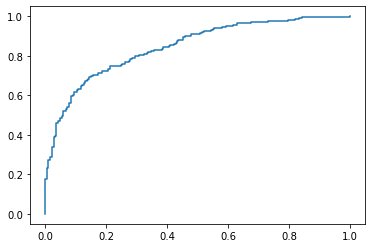

In [226]:
plt.plot(fpr,tpr)

In [227]:
x1 = df.drop('Customer Status', axis = 1).values
y1 = df['Customer Status'].values

In [228]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1, test_size = .2, random_state = 30)

In [229]:
 from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [230]:
dc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [231]:
y1_pred = dc.predict(x1_test)

In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_pred)

array([[132,  90],
       [ 95, 374]], dtype=int64)

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       222
           1       0.81      0.80      0.80       469

    accuracy                           0.73       691
   macro avg       0.69      0.70      0.69       691
weighted avg       0.73      0.73      0.73       691



In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rfs = RandomForestClassifier()

In [241]:
rfs.fit(x1_train,y1_train)

RandomForestClassifier()

In [242]:
y1_rfs_pred = rfs.predict(x1_test)

In [243]:
print(classification_report(y1_test,y1_rfs_pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       222
           1       0.82      0.87      0.84       469

    accuracy                           0.78       691
   macro avg       0.75      0.73      0.74       691
weighted avg       0.78      0.78      0.78       691



In [244]:
from sklearn.model_selection import RandomizedSearchCV

In [247]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,120,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,20,2 ,dtype=int)

In [248]:
random_grid = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [249]:
rds = RandomizedSearchCV(estimator= rfs, param_distributions = random_grid, cv = 6, n_iter = 10, n_jobs = 1)

In [250]:
rds.fit(x1_train,y1_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 20]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150]})

In [251]:
rds.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'max_features': 'sqrt',
 'max_depth': 58,
 'criterion': 'gini'}

In [252]:
rfbp = RandomForestClassifier(n_estimators= 100,min_samples_split= 20,max_features= 'sqrt',max_depth= 58,criterion= 'gini')

In [253]:
rfbp.fit(x1_train,y1_train)

RandomForestClassifier(max_depth=58, max_features='sqrt', min_samples_split=20)

In [254]:
y_rf_pred = rfbp.predict(x1_test)

In [255]:
print(classification_report(y1_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       222
           1       0.81      0.88      0.84       469

    accuracy                           0.78       691
   macro avg       0.75      0.72      0.73       691
weighted avg       0.77      0.78      0.77       691

